In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

modes = ['hopfield', 'merge', 'distribute']
datasets = ['20-10-5-3', '50-20-10-5', '100-50-20-10', 'EpiGibson']

sigma_list = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
evals = ['curEvent', 'nxtEvent', 'sensory']

colors = ['blue', 'green', 'red']
color_dict = {
    modes[i]:colors[i] for i in range(3)
}

markers = ['.', '.', '.', '.']
marker_dict = {
    datasets[i]:markers[i] for i in range(4)
}

num_random_exp = 4


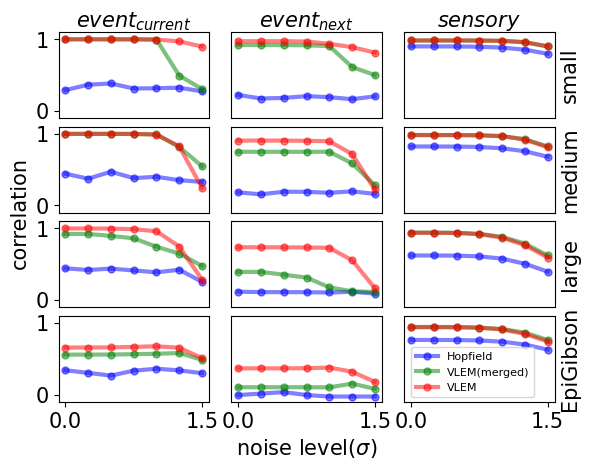

In [ ]:
fig = plt.figure()
fig.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.1)
fig_id = 0
fontsize = 15
attr2txt = {'curEvent' : '$event_{current}$', 'nxtEvent' : '$event_{next}$', 'sensory' : '$sensory$'}
for dataset in datasets:
    for attr in ['curEvent', 'nxtEvent', 'sensory']:
        fig_id += 1
        ax = plt.subplot(4,3,fig_id)
        plt.ylim(-0.1, 1.1)
        if fig_id == 4:
            plt.ylabel('correlation', fontsize=fontsize, y=0.)
        if fig_id % 3 == 0:
            ax.yaxis.set_label_position('right')
            if fig_id == 3:
                plt.ylabel('small', fontsize=fontsize)
            elif fig_id == 6:
                plt.ylabel('medium', fontsize=fontsize)
            elif fig_id == 9:
                plt.ylabel('large', fontsize=fontsize)
            elif fig_id == 12:
                plt.ylabel('EpiGibson', fontsize=fontsize)
        if fig_id % 3 == 1:
            plt.yticks([0, 1], fontsize=fontsize)
        else:
            plt.yticks([])
        if fig_id == 11:
            plt.xlabel(f'noise level($\sigma$)', fontsize=fontsize)

        if fig_id <= 3:
            ax.xaxis.set_label_position('top')
            plt.xlabel(f'{attr2txt[attr]}', fontsize=fontsize)
        if fig_id > 9:
            plt.xticks([0, 1.5], fontsize=fontsize)
        else:
            plt.xticks([])
        for mode in modes:
            corr_sum = 0.
            if dataset == 'EpiGibson':
                for random_idx in range(num_random_exp):
                    if mode == 'hopfield':
                        path = f'./outputs/EpiGibson-merge-{random_idx}/eval-results-hopfield.pkl'
                    else:
                        path = f'./outputs/EpiGibson-{mode}-{random_idx}/eval-results.pkl'
                    with open(path, 'rb') as f:
                        data = pickle.load(f)
                    corr = [data[sigma][attr]['correlation'] for sigma in sigma_list]
                    corr_sum = corr_sum + np.array(corr)
                corr_sum /= num_random_exp
            else:
                for random_idx in range(num_random_exp):
                    if mode == 'hopfield':
                        path = f'./outputs/patternDataset-merge-{dataset}-{random_idx}/eval-results-hopfield.pkl'
                    else:
                        path = f'./outputs/patternDataset-{mode}-{dataset}-{random_idx}/eval-results.pkl'

                    with open(path, 'rb') as f:
                        data = pickle.load(f)
                    corr = [data[sigma][attr]['correlation'] for sigma in sigma_list]
                    corr_sum = corr_sum + np.array(corr)
                corr_sum /= num_random_exp

            plt.plot(sigma_list, corr_sum, linewidth=3, alpha=0.5, color=color_dict[mode], marker=marker_dict[dataset], markersize=10)

plt.legend(['Hopfield', 'VLEM(merged)', 'VLEM'], bbox_to_anchor=(0.9, 0.7), fontsize=8)
plt.savefig('outputs/eval-results.png', dpi=300)
plt.show()


In [ ]:
for dataset in datasets[:3]:
    print(f'-------- patternDataset {dataset} --------')
    for attr in ['curEvent', 'nxtEvent', 'sensory']:
        for mode in modes:
            corr_0 = 0.
            corr_1 = 0.
            mse_0 = 0.
            mse_1 = 0.
            for random_idx in range(num_random_exp):
                if mode == 'hopfield':
                    path = f'./outputs/patternDataset-merge-{dataset}-{random_idx}/eval-results-hopfield.pkl'
                else:
                    path = f'./outputs/patternDataset-{mode}-{dataset}-{random_idx}/eval-results.pkl'
                with open(path, 'rb') as f:
                    data = pickle.load(f)

                corr_0 += data[0][attr]['correlation']
                corr_1 += data[1][attr]['correlation']
                mse_0 += data[0][attr]['l2_loss']
                mse_1 += data[1][attr]['l2_loss']

            corr_0 /= num_random_exp
            corr_1 /= num_random_exp
            mse_0 /= num_random_exp
            mse_1 /= num_random_exp
            print(f'mode : {mode} attr : {attr}')
            print('corr : %.3f -- %.3f; MSE : %.3f -- %.3f' % (corr_0, corr_1, mse_0, mse_1))


In [ ]:
for attr in ['curEvent', 'nxtEvent', 'sensory']:
    for mode in modes:
        corr_0 = 0.
        corr_1 = 0.
        mse_0 = 0.
        mse_1 = 0.
        for random_idx in range(num_random_exp):
            if mode == 'hopfield':
                path = f'./outputs/EpiGibson-merge-{random_idx}/eval-results-hopfield.pkl'
            else:
                path = f'./outputs/EpiGibson-{mode}-{random_idx}/eval-results.pkl'
            with open(path, 'rb') as f:
                data = pickle.load(f)

            corr_0 += data[0][attr]['correlation']
            corr_1 += data[1][attr]['correlation']
            mse_0 += data[0][attr]['l2_loss']
            mse_1 += data[1][attr]['l2_loss']

        corr_0 /= num_random_exp
        corr_1 /= num_random_exp
        mse_0 /= num_random_exp
        mse_1 /= num_random_exp
        print(f'mode : {mode} attr : {attr}')
        print('corr : %.3f -- %.3f; MSE : %.3f -- %.3f' % (corr_0, corr_1, mse_0, mse_1))
